# Google Takeout: Location data / 位置データ

This Jupyter notebook provides a detailed step-by-step example of how Google Takeout's location history data can be extracted with `excavator` then viewed with popular Python visualization libraries. 

このJupyterノートブックでは、Google Takeoutの位置情報履歴データを`excavator`で抽出し、Pythonの人気可視化ライブラリで表示する方法をステップバイステップで詳細に説明します。

In [1]:
import subprocess
import sqlite3
import pandas as pd
import seaborn as sns

## Download Takeout Data / Takeoutデータのダウンロード

The first step is to download your Google Takeout data. In this example, we will be looking at Location History.

To download your Google Takeout Location History, you should:

1. [Sign in](https://accounts.google.com/signin/) to your Google Account.
2. Go to https://takeout.google.com/settings/takeout and select the data to include in the export. In this example we are only selecting Location History.
3. Choose file type, frequency, and destination: we will select to download the file via email link and export once.
4. Click `Create Export`.

At this point, you should have received an email with the download link of your Google Location History. Download the file and **extract its contents to this directory**. You should now have a folder named `Google Takeout` in this directory.

Note, this document uses annonymously donated Google location history data.

まず最初に、Google Takeoutのデータをダウンロードします。この例では、位置情報履歴を見てみましょう。

Google Takeoutの位置情報履歴をダウンロードするには、以下のようにします。

1. Googleアカウントに[サインイン](https://accounts.google.com/signin/)します。
2. https://takeout.google.com/settings/takeout にアクセスし、エクスポートに含めるデータを選択します。この例では、位置情報履歴のみを選択しています。
3. ファイルの種類、回数、保存先を選択します。ここでは、電子メールのリンク経由でファイルをダウンロードし、1回だけエクスポートすることを選択します。
4. `エクスポートの作成`をクリックします。

この時点で、Google位置情報履歴のダウンロードリンクが記載されたメールを受け取っているはずです。ファイルをダウンロードし、**その内容をこのディレクトリに展開してください**。このディレクトリに、`Google Takeout`という名前のフォルダができるはずです。

なお、このドキュメントでは、匿名提供されたGoogle位置情報履歴データを使用しています。

## Excavate

We are now ready to excavate the data! Since we are only interested by the location history, we will specify the path to the `Location History` folder.

We will call the `excavator` command using the `subprocess` [module](https://docs.python.org/3/library/subprocess.html).

これでデータ発掘の準備が整いました！ 今回は位置情報の履歴にしか興味がないので、`Location History`フォルダのパスを指定することにします。

`subprocess` [module](https://docs.python.org/3/library/subprocess.html) を使って `excavator` コマンドを呼び出してみます。

In [2]:
command = ["excavator", "read", "PATH_TO_YOUR_FILE", "--dbfile", "GoogleLocationHistory.db"]

subprocess.call(command)

0

The above command tells the computer to run the `read` command of the `excavator` program. `PATH_TO_YOUR_FILE` is where your data is stored on your device and `--dbfile GoogleLocationHistory.db` tells it to save the resulting data to the file `GoogleLocationHistory.db`.

上記のコマンドは、`excavator`プログラムの`read`コマンドを実行するようにコンピュータに指示します。`PATH_TO_YOUR_FILE` はあなたのデータが保存されている場所、`--dbfile GoogleLocationHistory.db` は得られたデータをファイル `GoogleLocationHistory.db` に保存するように指示しています。

## Load

With the excavation complete, we can now load the data! Location history from Google is saved in the table `google_location_history`.

We will load the data with pandas, examine the data, do some preprocessing, then convert it to a geopanadas dataframe.

We are doing any preprocessing first (such as filtering the data) because converting the data to a geopandas object can be very time consuming with large volumes of data.

発掘が完了したので、いよいよデータをロードしてみましょう Google の位置情報の履歴は `google_location_history` というテーブルに保存されています。

このデータをpandasで読み込み、データを調べ、前処理を行い、geopanadasのデータフレームに変換していきます。

大量のデータをgeopandasオブジェクトに変換するのは非常に時間がかかるため、最初に前処理（データのフィルタリングなど）を行っています。

In [3]:
# connect to the excavated file
connection = sqlite3.connect('GoogleLocationHistory.db')

# load the data as a pandas object
df = pd.read_sql_query("SELECT * FROM google_location_history", connection)

# examine the data
df

id            source activity  \
0            1  location_history    STILL   
1            2  location_history       na   
2            3  location_history       na   
3            4  location_history       na   
4            5  location_history       na   
...        ...               ...      ...   
112131  112132       place_visit     None   
112132  112133       place_visit     None   
112133  112134       place_visit     None   
112134  112135       place_visit     None   
112135  112136       place_visit     None   

                                                  address  \
0                                                    None   
1                                                    None   
2                                                    None   
3                                                    None   
4                                                    None   
...                                                   ...   
112131            2 Allée de l'isara, 95000 Cergy, France   
112132  Rue De La Croix Des Maheux 95003\n95000 Cergy\...   
112133            2 Allée de l'isara, 95000 Cergy, France   
112134     2 Rue des Chênes Pourpres\n95800 Cergy\nFrance   
112135            2 Allée de l'isara, 95000 Cergy, France   

                                     place_name  timestamp_msec  accuracy  \
0                                          None   1621352204241  20.00000   
1                                          None   1621352224618  20.00000   
2                                          None   1621352240000  66.00000   
3                                          None   1621352245000  48.00000   
4                                          None   1621352246000  46.00000   
...                                         ...             ...       ...   
112131                        2 All. de l'isara   1641746158693  69.78562   
112132        Centre Commercial Les 3 Fontaines   1641805999016  89.49450   
112133                        2 All. de l'isara   1641808846564  64.86925   
112134  Basic-Fit Cergy Rue des Chênes Pourpres   1641810947860  89.42763   
112135                        2 All. de l'isara   1641814411554  69.46241   

        verticalaccuracy  altitude        lat       lng  
0                    0.0       0.0  47.768200 -3.117894  
1                    0.0       0.0  47.768201 -3.117894  
2                    0.0       0.0  47.768220 -3.117908  
3                    0.0       0.0  47.768347 -3.118073  
4                    0.0       0.0  47.768364 -3.118109  
...                  ...       ...        ...       ...  
112131               NaN       NaN  49.032883  2.066607  
112132               NaN       NaN  49.038273  2.081293  
112133               NaN       NaN  49.032883  2.066607  
112134               NaN       NaN  49.040835  2.073765  
112135               NaN       NaN  49.032883  2.066607  

[112136 rows x 11 columns]

Let's convert the unix timestamp to datetime.

unixのタイムスタンプをdatetimeに変換してみましょう。

In [4]:
df['timestamp_msec'] = pd.to_datetime(df['timestamp_msec'], unit='ms').dt.tz_localize(tz='CET', ambiguous=True) #Change tz value
df.rename(columns={'timestamp_msec':'datetime'}, inplace=True)
df

id            source activity  \
0            1  location_history    STILL   
1            2  location_history       na   
2            3  location_history       na   
3            4  location_history       na   
4            5  location_history       na   
...        ...               ...      ...   
112131  112132       place_visit     None   
112132  112133       place_visit     None   
112133  112134       place_visit     None   
112134  112135       place_visit     None   
112135  112136       place_visit     None   

                                                  address  \
0                                                    None   
1                                                    None   
2                                                    None   
3                                                    None   
4                                                    None   
...                                                   ...   
112131            2 Allée de l'isara, 95000 Cergy, France   
112132  Rue De La Croix Des Maheux 95003\n95000 Cergy\...   
112133            2 Allée de l'isara, 95000 Cergy, France   
112134     2 Rue des Chênes Pourpres\n95800 Cergy\nFrance   
112135            2 Allée de l'isara, 95000 Cergy, France   

                                     place_name  \
0                                          None   
1                                          None   
2                                          None   
3                                          None   
4                                          None   
...                                         ...   
112131                        2 All. de l'isara   
112132        Centre Commercial Les 3 Fontaines   
112133                        2 All. de l'isara   
112134  Basic-Fit Cergy Rue des Chênes Pourpres   
112135                        2 All. de l'isara   

                               datetime  accuracy  verticalaccuracy  altitude  \
0      2021-05-18 15:36:44.241000+02:00  20.00000               0.0       0.0   
1      2021-05-18 15:37:04.618000+02:00  20.00000               0.0       0.0   
2             2021-05-18 15:37:20+02:00  66.00000               0.0       0.0   
3             2021-05-18 15:37:25+02:00  48.00000               0.0       0.0   
4             2021-05-18 15:37:26+02:00  46.00000               0.0       0.0   
...                                 ...       ...               ...       ...   
112131 2022-01-09 16:35:58.693000+01:00  69.78562               NaN       NaN   
112132 2022-01-10 09:13:19.016000+01:00  89.49450               NaN       NaN   
112133 2022-01-10 10:00:46.564000+01:00  64.86925               NaN       NaN   
112134 2022-01-10 10:35:47.860000+01:00  89.42763               NaN       NaN   
112135 2022-01-10 11:33:31.554000+01:00  69.46241               NaN       NaN   

              lat       lng  
0       47.768200 -3.117894  
1       47.768201 -3.117894  
2       47.768220 -3.117908  
3       47.768347 -3.118073  
4       47.768364 -3.118109  
...           ...       ...  
112131  49.032883  2.066607  
112132  49.038273  2.081293  
112133  49.032883  2.066607  
112134  49.040835  2.073765  
112135  49.032883  2.066607  

[112136 rows x 11 columns]

***Note***: Change the value `tz='CET'` by your own timezone.

**Note**: `tz='CET'`の値は、自分のタイムゾーンに変更してください。

## Examine our data with a Heatmap / ヒートマップによるデータ検分

We have a lot of geographical points. The first thing that we could do to visualize this data is creating a heatmap based on our locations. 

位置情報を有するポイントが数多く出てきます。このデータを視覚化するために、まずは位置に基づいたヒートマップを作成してみましょう。

In [5]:
from folium import Map
from folium.plugins import HeatMap

In [6]:
for_map = Map(location=[48.856614, 2.3522219], zoom_start=8, )

hm_wide = HeatMap(
    list(zip(df.lat.values, df.lng.values)),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
)

for_map.add_child(hm_wide)

Using [folium](https://python-visualization.github.io/folium/), we can easily create a heatmap to describe our data. On the first line, `Map(location=[48.856614, 2.3522219], zoom_start=8, )` the location is used as starting point of our map once it is generated, you can change it depending on where you have the most location coordonates. For example if you want to center the map on Tokyo, use `Map(location=[35.689487, 139.691706], zoom_start=8, )`.

[folium](https://python-visualization.github.io/folium/)を使うと、データを表現するヒートマップを簡単に作成することができます。最初の行の `Map(location=[48.856614, 2.3522219], zoom_start=8, )` は、一度作成した地図の初期表示地点として使われるので、位置座標が最も多い場所に変更することができます。例えば、東京を中心にしたい場合は、`Map(location=[35.689487, 139.691706], zoom_start=8, )` を使用します。

## Examine the differences between week-ends and workdays / 週末と平日の差異を検証


An interesting visualization would be separating the locations between workdays and week-ends. Let's first convert our datetime into days.

平日と週末で場所を分けて可視化するのも面白いかもしれません。まず、datetimeを日数に変換してみましょう。

In [7]:
df_days= df.copy()
df_days['datetime']=df_days['datetime'].dt.day_name()
df_days=df_days.drop(['id','activity','source','accuracy','verticalaccuracy','altitude'],axis=1)
df_days

address  \
0                                                    None   
1                                                    None   
2                                                    None   
3                                                    None   
4                                                    None   
...                                                   ...   
112131            2 Allée de l'isara, 95000 Cergy, France   
112132  Rue De La Croix Des Maheux 95003\n95000 Cergy\...   
112133            2 Allée de l'isara, 95000 Cergy, France   
112134     2 Rue des Chênes Pourpres\n95800 Cergy\nFrance   
112135            2 Allée de l'isara, 95000 Cergy, France   

                                     place_name datetime        lat       lng  
0                                          None  Tuesday  47.768200 -3.117894  
1                                          None  Tuesday  47.768201 -3.117894  
2                                          None  Tuesday  47.768220 -3.117908  
3                                          None  Tuesday  47.768347 -3.118073  
4                                          None  Tuesday  47.768364 -3.118109  
...                                         ...      ...        ...       ...  
112131                        2 All. de l'isara   Sunday  49.032883  2.066607  
112132        Centre Commercial Les 3 Fontaines   Monday  49.038273  2.081293  
112133                        2 All. de l'isara   Monday  49.032883  2.066607  
112134  Basic-Fit Cergy Rue des Chênes Pourpres   Monday  49.040835  2.073765  
112135                        2 All. de l'isara   Monday  49.032883  2.066607  

[112136 rows x 5 columns]

In [8]:
week_end=['Saturday','Sunday']
df_week_end = df_days[df_days.datetime.isin(week_end)]
df_week_end

address  \
1904                                                 None   
1905                                                 None   
1906                                                 None   
1907                                                 None   
1908                                                 None   
...                                                   ...   
112127            2 Allée de l'isara, 95000 Cergy, France   
112128  Rue De La Croix Des Maheux 95003\n95000 Cergy\...   
112129            2 Allée de l'isara, 95000 Cergy, France   
112130     2 Rue des Chênes Pourpres\n95800 Cergy\nFrance   
112131            2 Allée de l'isara, 95000 Cergy, France   

                                     place_name  datetime        lat       lng  
1904                                       None  Saturday  47.768204 -3.117874  
1905                                       None  Saturday  47.768204 -3.117874  
1906                                       None  Saturday  47.768204 -3.117874  
1907                                       None  Saturday  47.768204 -3.117874  
1908                                       None  Saturday  47.768204 -3.117874  
...                                         ...       ...        ...       ...  
112127                        2 All. de l'isara    Sunday  49.032883  2.066607  
112128        Centre Commercial Les 3 Fontaines    Sunday  49.038273  2.081293  
112129                        2 All. de l'isara    Sunday  49.032883  2.066607  
112130  Basic-Fit Cergy Rue des Chênes Pourpres    Sunday  49.040835  2.073765  
112131                        2 All. de l'isara    Sunday  49.032883  2.066607  

[31664 rows x 5 columns]

In [9]:
for_map_week_end = Map(location=[48.856614, 2.3522219], zoom_start=8, )

hm_wide_week_end = HeatMap(
    list(zip(df_week_end.lat.values, df_week_end.lng.values)),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
)

for_map_week_end.add_child(hm_wide_week_end)

In [10]:
df_workdays = df_days[~df.datetime.isin(week_end)]
df_workdays

address  \
0                                                    None   
1                                                    None   
2                                                    None   
3                                                    None   
4                                                    None   
...                                                   ...   
112131            2 Allée de l'isara, 95000 Cergy, France   
112132  Rue De La Croix Des Maheux 95003\n95000 Cergy\...   
112133            2 Allée de l'isara, 95000 Cergy, France   
112134     2 Rue des Chênes Pourpres\n95800 Cergy\nFrance   
112135            2 Allée de l'isara, 95000 Cergy, France   

                                     place_name datetime        lat       lng  
0                                          None  Tuesday  47.768200 -3.117894  
1                                          None  Tuesday  47.768201 -3.117894  
2                                          None  Tuesday  47.768220 -3.117908  
3                                          None  Tuesday  47.768347 -3.118073  
4                                          None  Tuesday  47.768364 -3.118109  
...                                         ...      ...        ...       ...  
112131                        2 All. de l'isara   Sunday  49.032883  2.066607  
112132        Centre Commercial Les 3 Fontaines   Monday  49.038273  2.081293  
112133                        2 All. de l'isara   Monday  49.032883  2.066607  
112134  Basic-Fit Cergy Rue des Chênes Pourpres   Monday  49.040835  2.073765  
112135                        2 All. de l'isara   Monday  49.032883  2.066607  

[112136 rows x 5 columns]

In [11]:
for_map_workdays = Map(location=[48.856614, 2.3522219], zoom_start=8, )

hm_wide_workdays = HeatMap(
    list(zip(df_workdays.lat.values, df_workdays.lng.values)),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
)

for_map_workdays.add_child(hm_wide_workdays)

We have a pretty nice result here. There is a big difference between week-end records and workdays records: we can see that during workdays, there is a more brightfull area in the North of Paris, on `Cergy`. We can deduce that the individual works or studies in Cergy. We can also understand that he should live in the south-west of Paris, near `Montigny-le-Bretonneux`. 

**Concrete Analysis: The student who shared this data's hometown is near to `Montigny-le-Bretonneux`. He leaves and studies in `Cergy` during the week, and come back to his hometown in `Montigny-le-Bretonneux` every week-ends. However, due to Covid crisis, there was a period when he only had online courses, this is why even in his hometown there is a brightful area during the workdays, when he should be in `Cergy`. 
We can also notice a light trail from Parisian area to the West in `Bretagne`. It is his mother's house where he spends time during holidays. 
Finally, there is a light trail from Parisian area to the city of `Dijon` in the East-South of Paris. It is his father's house where he also spends time during holidays.**

*Apply the code on your own data and analyze it the same way we did*.

なかなかいい結果が出ていますね。週末の記録と平日の記録には大きな違いがあります。平日には、パリの北部、`Cergy`にもっと明るいエリアがあることがわかります。これは、その人が`Cergy`で仕事をしているか、勉強していることが推測できます。また、彼はパリの南西、`Montigny-le-Bretonneux`の近くに住んでいることが分かります。

**具体的な分析 このデータを共有した学生の出身地は、`Montigny-le-Bretonneux`の近くです。平日は`Cergy`で勉強し、週末になると`Montigny-le-Bretonneux`に帰ってきます。しかし、Covidの危機により、オンライン授業しかない時期があり、そのため、`Cergy`にいるはずの平日でも、地元では明るい場所があるのです。
また、パリから西のブルターニュ地方にも光の跡が見られます。これは彼の母親の家で、休日はここで過ごすことがあります。
最後に、パリ周辺からパリの東南にあるディジョンの街まで光の跡があります。これは彼の父親の家で、休みの日には彼もここにいることがあります。

*このコードを自分のデータに適用して、私たちと同じように分析してみてください。*

#### Idea of improvement / 改造アイデア

**COVID CRISIS:** It would be really interesting to have location data starting before 2020 because we could analyze the differences between locations by year. We could easily guess that we would have less areas represented since 2020 because of the covid crisis. Also we would see the impact of working from home. 

**COVID CRISIS:**2020年以前からの位置情報データがあれば、年による位置の違いを分析することができ、とても面白いです。2020年以降はCOVID危機のため、表現される地域が少なくなることは容易に推測できます。また、在宅勤務の影響もわかるはずです。

An interesting information would be to display the most visited places. We can use the `place_name` column.

面白い情報としては、最も訪問された場所を表示することです。この場合、 `place_name` カラムを使用することができます。

In [12]:
df_visited_places=df.copy()
df_visited_places['place_name'].value_counts()

79 Rue de la Division Leclerc              68
Cy Tech                                    63
Cy Tech - Site Fermat                      62
Basic-Fit Cergy Rue des Chênes Pourpres    35
5 Ham. de Lannouan                         33
                                           ..
3 Rue des Pingulières                       1
9 Rue de Maizières                          1
Regional Center De Formation                1
Le Guichet                                  1
36 Rue Stephenson                           1
Name: place_name, Length: 187, dtype: int64

<AxesSubplot:>

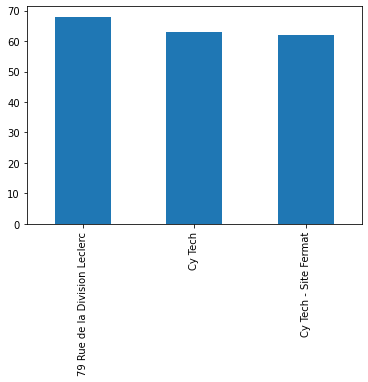

In [13]:
df_visited_places['place_name'].value_counts().head(3).plot.bar()

This is interesting, but a bit disappointing as we don't have so much information. In our case, we have around 800 `place_name` for 112 136 records... We could use tools like `Google Geocoding API` or `geopy` to associate to every coordonates a place.

面白いことは面白いのですが、それほど多くの情報を持っているわけではなく、少し残念です。私たちの場合、112 136のレコードに対して、約800の `place_name` があります... `Google Geocoding API` や `geopy` といったツールを使って、各コーディネートに場所を関連付けることができるかもしれません。

### Using `reverse_geocoder`

Very useful packages are available in Python to convert **(latitude,longitude)** to **addresses**. However, the majority is not free or has some daily queries limits. This is why we use `reverse_geocoder`, that has no limit, but only gives us the name of the city and the country, not the exact address. 

Pythonで **(緯度・経度)** から **住所** に変換するためには非常に便利なパッケージがあります。しかし、その多くはフリーでなかったり、1日のクエリ数が制限されていたりします。そのため、私たちは `reverse_geocoder` を使っています。このパッケージには制限がありませんが、正確な住所ではなく、都市名と国名を教えてくれるに過ぎません。

In [17]:
import reverse_geocoder as rg

In [18]:
def reverseGeocode(coordinates):
    result = rg.search(coordinates)
    return result  
coordinates =list(zip(df_days['lat'],df_days['lng'])) # generates pair of (lat,long)
data = reverseGeocode(coordinates)
df_days['city'] = [i['name'] for i in data]
df_days['country'] = [i['cc'] for i in data]
df_days

Loading formatted geocoded file...


address  \
0                                                    None   
1                                                    None   
2                                                    None   
3                                                    None   
4                                                    None   
...                                                   ...   
112131            2 Allée de l'isara, 95000 Cergy, France   
112132  Rue De La Croix Des Maheux 95003\n95000 Cergy\...   
112133            2 Allée de l'isara, 95000 Cergy, France   
112134     2 Rue des Chênes Pourpres\n95800 Cergy\nFrance   
112135            2 Allée de l'isara, 95000 Cergy, France   

                                     place_name datetime        lat       lng  \
0                                          None  Tuesday  47.768200 -3.117894   
1                                          None  Tuesday  47.768201 -3.117894   
2                                          None  Tuesday  47.768220 -3.117908   
3                                          None  Tuesday  47.768347 -3.118073   
4                                          None  Tuesday  47.768364 -3.118109   
...                                         ...      ...        ...       ...   
112131                        2 All. de l'isara   Sunday  49.032883  2.066607   
112132        Centre Commercial Les 3 Fontaines   Monday  49.038273  2.081293   
112133                        2 All. de l'isara   Monday  49.032883  2.066607   
112134  Basic-Fit Cergy Rue des Chênes Pourpres   Monday  49.040835  2.073765   
112135                        2 All. de l'isara   Monday  49.032883  2.066607   

                  city country  
0            Landevant      FR  
1            Landevant      FR  
2            Landevant      FR  
3            Landevant      FR  
4            Landevant      FR  
...                ...     ...  
112131           Cergy      FR  
112132  Cergy-Pontoise      FR  
112133           Cergy      FR  
112134  Cergy-Pontoise      FR  
112135           Cergy      FR  

[112136 rows x 7 columns]

<AxesSubplot:>

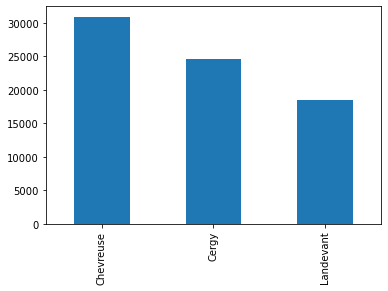

In [19]:
df_days['city'].value_counts().head(3).plot.bar()

With API like [Nominatim](https://nominatim.org/release-docs/latest/) or [Google Geocoding API](https://developers.google.com/maps/documentation/geocoding/start) we could even be more precise by having the exact address, but `Nominatim` has request limits and `Google Geocoding API` is not free.

[Nominatim](https://nominatim.org/release-docs/latest/) や [Google Geocoding API](https://developers.google.com/maps/documentation/geocoding/start) のようなAPIを使えば、正確な住所を得ることも可能ですが、`Nominatim`にはリクエスト制限があり、`Google Geocoding API`はフリーではありません。